# Simple Linear Regression

En este cuaderno veremos los conceptos detrás de una regresión lineal simple: `Y = b0 + b1*X`

* Intercepto `b0`
* Coeficiente `b1`
* Regresor `X`
* Objetivo `y`

También veremos el concepto de OLS aplicado como medida de rendimiento para este algoritmo. Midiendo el error entre el valor de salida predicho por el modelo y el valor original para cada instancia de X, podremos mejorar el entrenamiento.

La regresión linear se basa en cuatro suposiciones:
1. Linearidad: significa que la variable dependiente tiene una relación lineal con la variable independiente.
2. Normalidad: significa que los errores de las observaciones estan normalmente distribuidos.
3. Independencia: significa que el error de cada observación es independiente de las demás.
4. Homoscedasticidad: significa que la varianza del error de cada observación es constante para todas las observaciones.
5. Baja multi-colinearidad: significa que las variables independientes no estan altamente correlacionadas entre si.


## 1. Creamos un set de datos

En este caso a modo de ejemplo vamos a `crear` datos de 3 formas distintas:

1. `np.arange`
2. `np.random.uniform`
3. `np.random.randn`

La idea es que vean las diferencias entre las formas que posee NumPy. Para investigar cada método (ver que argumentos lleva y que retorna) pueden pararse dentro de los parentesis de cualquier función y usar la combinación `shift + ctrl + spacebar`

In [2]:
import numpy as np

In [3]:
np.random.seed(42) # Esta linea es para conservar los mismos valores "random" cada vez que se ejecute la celda
X = np.arange(300,dtype=int) #Empieza en 0 hasta el valor de stop que se elija, todos los valores son del tipo 'int'
X_uniform = np.random.uniform(-10,10,size=300)
X_randn = np.random.randn(300)

In [4]:
type(X), type(X_uniform), type(X_randn)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [5]:
print(f"X values samples: {X[:5]}, value max: {X.max()}, value min: {X.min()}, mean: {X.mean()}, std: {X.std():.2f}")
print(f"X_uniform values samples: {X_uniform[:5]}, value max: {X_uniform.max()}, value min: {X_uniform.min()}, mean: {X_uniform.mean():.5f}, std: {X_uniform.std():.2f}")
print(f"X_randn values samples: {X_randn[:5]}, value max: {X_randn.max()}, value min:{X_randn.min()}, mean: {X_randn.mean():.5f}, std: {X_randn.std():.2f}")

X values samples: [0 1 2 3 4], value max: 299, value min: 0, mean: 149.5, std: 86.60
X_uniform values samples: [-2.50919762  9.01428613  4.63987884  1.97316968 -6.87962719], value max: 9.801077002085265, value min: -9.898768323075625, mean: -0.09591, std: 5.88
X_randn values samples: [ 0.04557184 -0.65160035  2.14394409  0.63391902 -2.02514259], value max: 3.0788808084552377, value min:-3.2412673400690726, mean: -0.01421, std: 0.99


## 2. Visualizamos

In [6]:
import matplotlib.pyplot as plt

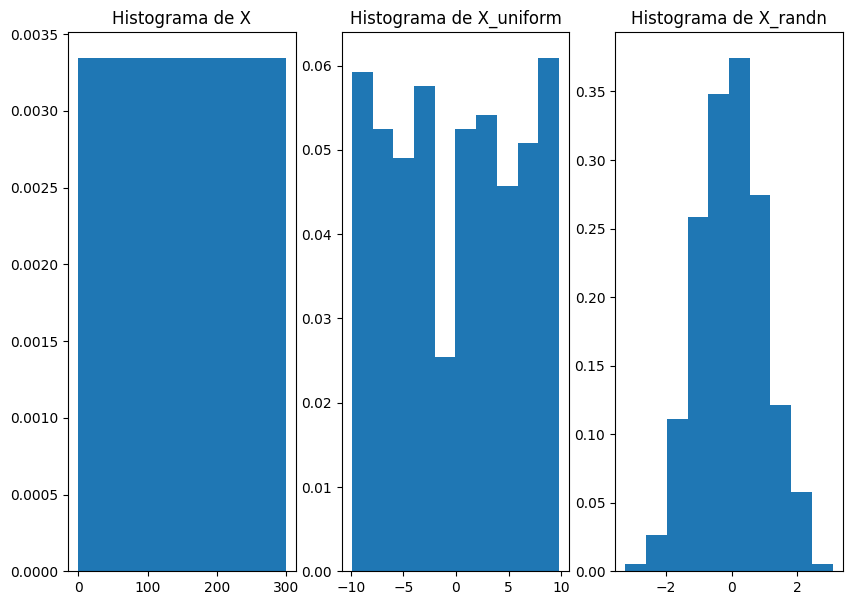

In [7]:
# Visualizamos la distribución de los datos/valores de las variables independientes creadas
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.hist(X,density=True)
plt.title("Histograma de X")
plt.subplot(1,3,2)
plt.hist(X_uniform,density=True)
plt.title("Histograma de X_uniform")
plt.subplot(1,3,3)
plt.hist(X_randn,density=True)
plt.title("Histograma de X_randn");

## 3. Armamos una relación lineal

In [8]:
# Vamos a crear una relación entre una variable dependiente y las variables independientes creadas hasta ahora
# Usaremos para este ejemplo X y X_uniform
# La relación es lineal del tipo: y = X*coef + intercept

coef = 0.5 # beta1
intercept = -1.3 #beta0
y = (X*coef) + intercept #En esta relación usamos como variable independiente el array X creado con np.arange()
y_uniform = (X_uniform*coef) + intercept #En esta relación usamos como variable independiente el array X_uniform creado con np.random.uniform()
y_randn = (X_randn*coef) + intercept

In [9]:
type(y), type(y_uniform), type(y_randn)

(numpy.ndarray, numpy.ndarray, numpy.ndarray)

## 4. Visualizamos

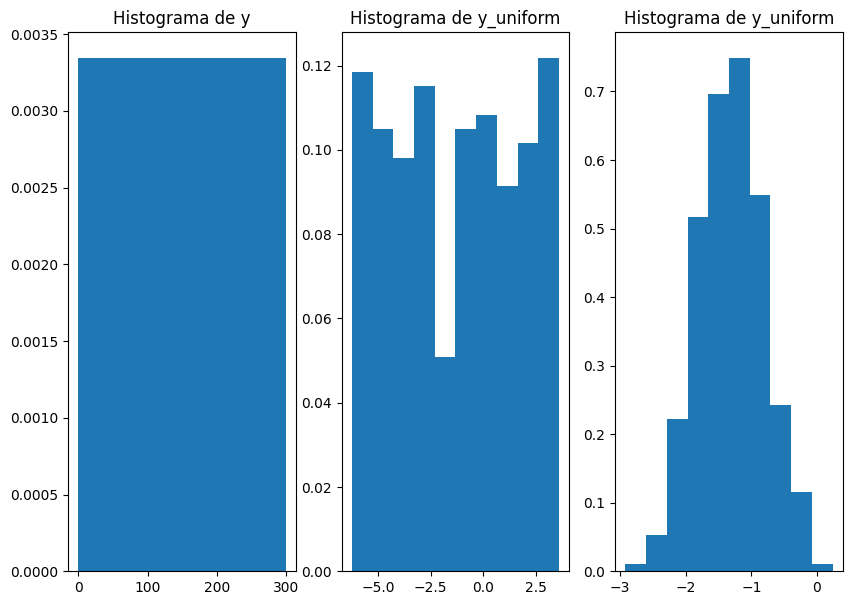

In [10]:
# Visualizamos la distribución de los datos/valores de las variables dependientes creadas
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.hist(X,density=True)
plt.title("Histograma de y")
plt.subplot(1,3,2)
plt.hist(y_uniform,density=True)
plt.title("Histograma de y_uniform");
plt.subplot(1,3,3)
plt.hist(y_randn,density=True)
plt.title("Histograma de y_uniform");

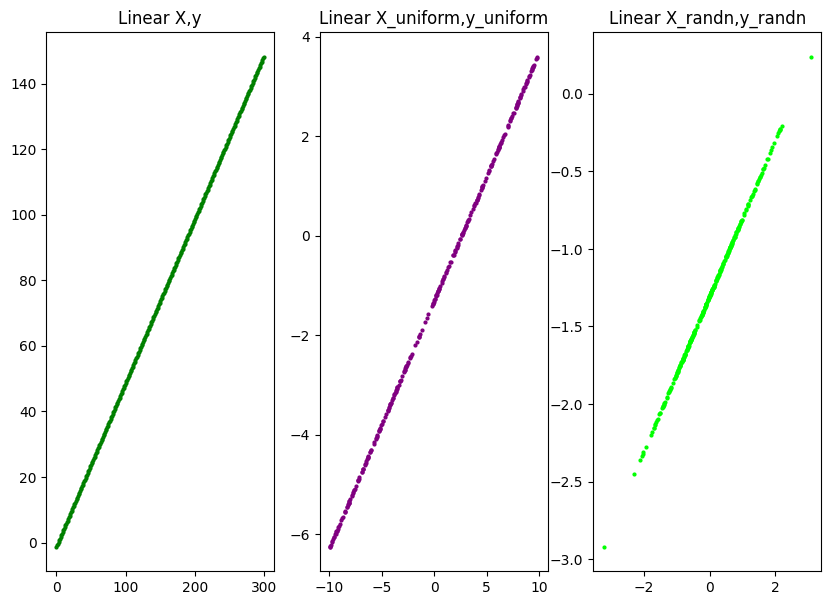

In [11]:
#Visualizamos ambas relaciones lineales
plt.figure(figsize=(10,7))
plt.subplot(1,3,1)
plt.scatter(X,y,c='green',s=4)
plt.title("Linear X,y")
plt.subplot(1,3,2)
plt.scatter(X_uniform,y_uniform,c='purple',s=4)
plt.title("Linear X_uniform,y_uniform");
plt.subplot(1,3,3)
plt.scatter(X_randn,y_randn,c='lime',s=4)
plt.title("Linear X_randn,y_randn");

## 5. Armamos datos de entrenamiento y testeo

Para avanzar en la práctica de regresión lineal tomaremos el dataset de `X,y`.
Los pasos para implementar una regresión son:
1. Preprocesar los datos (si es necesario normalizar o estandarizar).
2. Separar los datos en conjuntos de `train`, `test` y `validation`.
3. Elegimos el modelo a utilizar.
4. Entrenamos el modelo.
5. Evaluamos el modelo.
6. Ajustamos el modelo (en caso de ser necesario).
7. Repetimos el paso 5 y 6 hasta lograr métricas que nos satisfagan.
8. Realizamos predicciones con datos nuevos.

In [12]:
#Primero separamos de forma tradicional
split_size = int(len(X)*0.8)
print(f"Tamaño del set de entrenamiento: {split_size}\nTamaño del set de testeo: {len(X)-split_size}")

Tamaño del set de entrenamiento: 240
Tamaño del set de testeo: 60


In [13]:
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
print(f"X_train length: {len(X_train)}, y_train length: {len(y_train)}")
print(f"X_test length: {len(X_test)}, y_test length: {len(y_test)}")

X_train length: 240, y_train length: 240
X_test length: 60, y_test length: 60


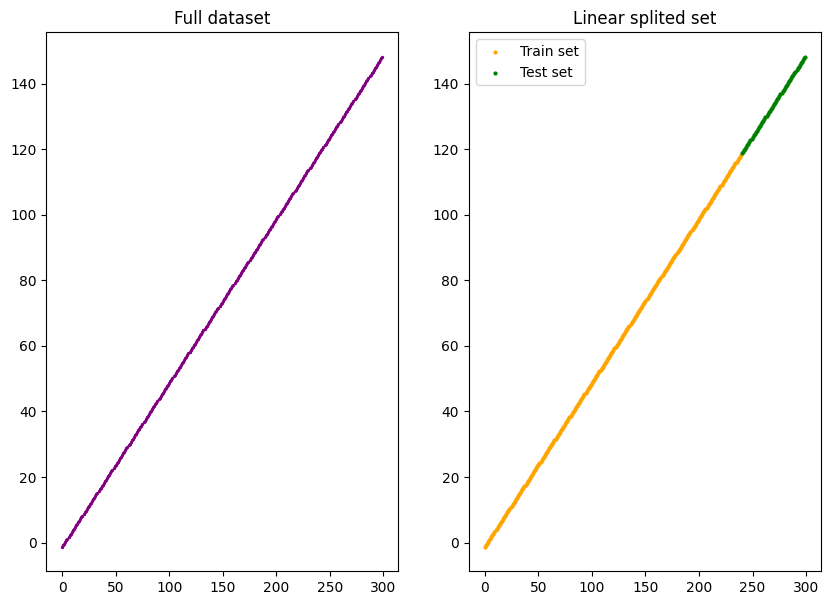

In [14]:
#Visualizamos los datos de entrenamiento y testeo
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(X,y,c='purple',s=2)
plt.title("Full dataset")
plt.subplot(1,2,2)
plt.scatter(X_train,y_train,c='orange',s=4,label='Train set')
plt.scatter(X_test,y_test,c='green',s=4,label='Test set')
plt.title("Linear splited set")
plt.legend();

>**Nota:** podemos ver que el set original de datos `X,y` ahora está dividido en conjunto de entrenamiento `[X_train, y_train]` y de testeo `[X_test, y_test]` de forma **no aleatoria** lo cual en este caso el set de testeo es representativo de la forma de la función original `y = b0 + b1*w` pero en otros casos como una función `sigmoide` esto no funcionaría porque separar los datos de esta forma **seguramente** generaría un set de datos de testo **no representativos** del resto de datos.

### 5.1 Creamos un set de datos no lineales (SIGMOID)



In [15]:
# Creamos una relación con la función sigmoide implementada con numpy
x = np.linspace(-10, 10, 300)
z = 1/(1 + np.exp(-x))
print(f"Tipo de estructura de datos: {type(z)}")

Tipo de estructura de datos: <class 'numpy.ndarray'>


In [16]:
# Separamos el conjunto de datos X,z en train y test
X_train_sigm, y_train_sigm = x[:split_size], z[:split_size]
X_test_sigm, y_test_sigm = x[split_size:], z[split_size:]
print(f"X_train length: {len(X_train_sigm)}, y_train length: {len(y_train_sigm)}")
print(f"X_test length: {len(X_test_sigm)}, y_test length: {len(y_test_sigm)}")

X_train length: 240, y_train length: 240
X_test length: 60, y_test length: 60


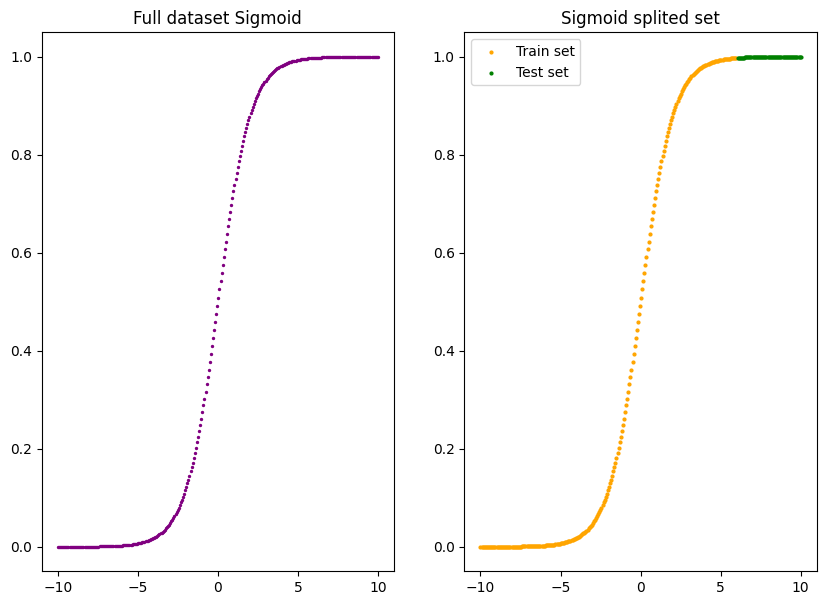

In [17]:
#Visualizamos los datos de entrenamiento y testeo no lineales
plt.figure(figsize=(10,7))
plt.subplot(1,2,1)
plt.scatter(x,z,c='purple',s=2)
plt.title("Full dataset Sigmoid")
plt.subplot(1,2,2)
plt.scatter(X_train_sigm,y_train_sigm,c='orange',s=4,label='Train set')
plt.scatter(X_test_sigm,y_test_sigm,c='green',s=4,label='Test set')
plt.title("Sigmoid splited set")
plt.legend();

>**Nota:** Dado el ejemplo de arriba 👆 vemos que hay que buscar una alternativa para separar los datos de forma aleatoria, así poder conservar la forma de la relación en los datos de testeo.

## 6. Separamos datos de forma randomizada

In [18]:
#para esto importamos scikit-learn que posee una función para separar los datos de forma ordenada
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Xtrain length: {len(Xtrain)}, ytrain length: {len(ytrain)}")
print(f"Xtest length: {len(Xtest)}, ytest length: {len(ytest)}")

Xtrain length: 240, ytrain length: 240
Xtest length: 60, ytest length: 60


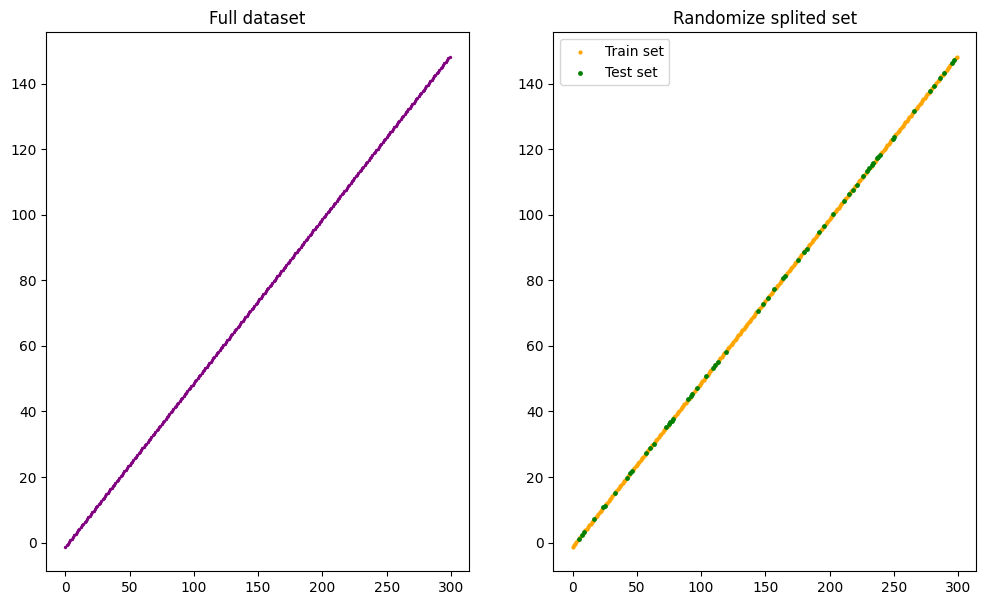

In [19]:
#Visualizamos los datos de entrenamiento y testeo
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(X,y,c='purple',s=2)
plt.title("Full dataset")
plt.subplot(1,2,2)
plt.scatter(Xtrain,ytrain,c='orange',s=4,label='Train set')
plt.scatter(Xtest,ytest,c='green',s=6,label='Test set')
plt.title("Randomize splited set")
plt.legend();

In [20]:
# Creamos una relación con la función sigmoide implementada con numpy
x_sigmoid = np.linspace(-10, 10, 300)
z = 1/(1 + np.exp(-x_sigmoid))
print(f"Tipo de estructura de datos: {type(z)}")
Xtrain_sigmoid, Xtest_sigmoid, ytrain_sigmoid, ytest_sigmoid = train_test_split(x_sigmoid, z, test_size=0.2, random_state=42)

Tipo de estructura de datos: <class 'numpy.ndarray'>


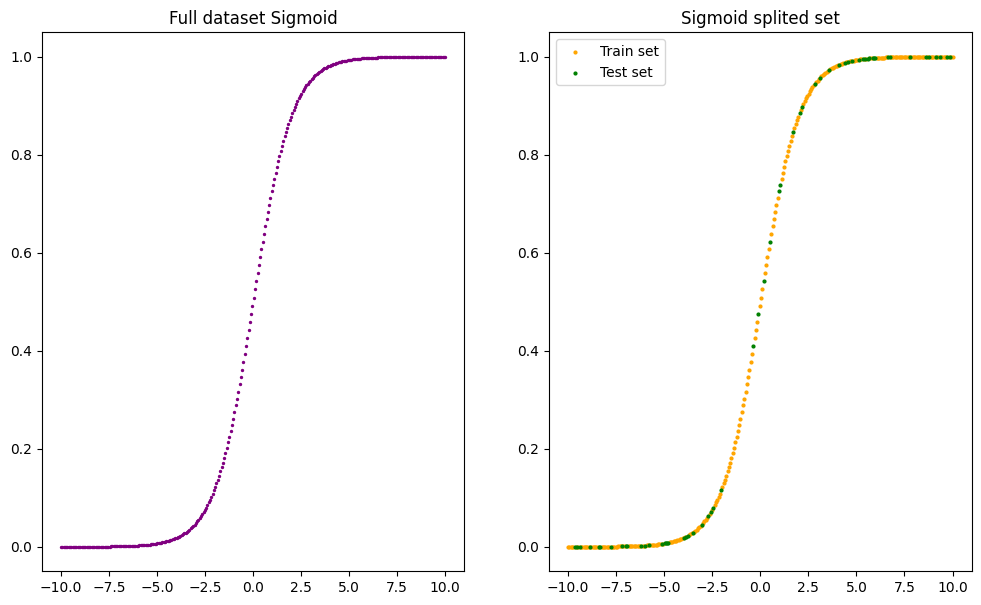

In [21]:
#Visualizamos los datos de entrenamiento y testeo
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
plt.scatter(x_sigmoid,z,c='purple',s=2)
plt.title("Full dataset Sigmoid")
plt.subplot(1,2,2)
plt.scatter(Xtrain_sigmoid,ytrain_sigmoid,c='orange',s=4,label='Train set')
plt.scatter(Xtest_sigmoid,ytest_sigmoid,c='green',s=4,label='Test set')
plt.title("Sigmoid splited set")
plt.legend();

## 7. Elegimos el modelo

En este caso vamos a probar 3 modelos de regresión, las tres estan basadas en el modelo OLS (mínimos cuadrados ordinarios).

1. Linear Regression (OLS)
2. Lasso: basada en OLS pero incorpora un peso `Lambda` para castigar aquellos valores demasiado altos que nos pueden conducir a overfitting y un poco entendimiento de la verdadera relación entre las variables predictoras y el objetivo.
3. Ridge: basado en OLS y tambien incorpora una forma de calculo para castigar los valos muy altos y reducir notablemente el overfitting. Sin embargo, no realiza una selección de variables como es el caso de Lasso.

El entrenamiento de los modelos lo haremos con el método `fit()` de cada objeto modelo instanciado. Usaremos el conjunto `[Xtrain,ytrain]` para entrenar y luego evaluaremos los modelos con el conjunto `[Xtest,ytest]`.

In [22]:
#Scikit-learn ya trae implementados muchos modelos, cuya hiper-parametrización resulta sencilla de implementar
from sklearn.linear_model import  LinearRegression, Lasso, Ridge
linear_r = LinearRegression()
lasso_r = Lasso()
ridge_r = Ridge()

In [23]:
Xtrain.shape

(240,)

In [24]:
Xtrain.reshape(-1,1).shape

(240, 1)

In [25]:
#entrenamos con la función .fit() y usamos el conjunto de entrenamiento solo para entrenar
linear_r.fit(Xtrain.reshape(-1,1),ytrain.reshape(-1,1))
lasso_r.fit(Xtrain.reshape(-1,1),ytrain.reshape(-1,1))
ridge_r.fit(Xtrain.reshape(-1,1),ytrain.reshape(-1,1))

Ridge()

## 8. Evaluamos el modelo

Para esto usamos el método `.score()` para calcular la metrica *coeficiente de determinación* o **R2** que incluye scikit-learn.

Usaremos el conjunto de testeo `[Xtest,ytest]` para calcular este score.

In [26]:
#Primero evaluamos los modelos entrenados
print(f"Linear Regression accuracy: {linear_r.score(Xtest.reshape(-1,1),ytest.reshape(-1,1))}")
print(f"Lasso Regression accuracy: {lasso_r.score(Xtest.reshape(-1,1),ytest.reshape(-1,1))}")
print(f"Ridge Regression accuracy: {ridge_r.score(Xtest.reshape(-1,1),ytest.reshape(-1,1))}")

Linear Regression accuracy: 1.0
Lasso Regression accuracy: 0.9999999280240824
Ridge Regression accuracy: 0.9999999999996876


## 9. Hacemos predicciones

Para hacer predicciones sobre el conjunto de testeo `[Xtest,ytest]`, ya que es el unico que no se uso durante el entrenamiento, sería como poner a prueba el modelo con datos que nunca observó hasta ahora.

También calcularemos las siguientes métricas:
1. R squared score.
2. Mean average error.
3. Mean squared error.

Las metricas usadas son unas pocas de varias que ofrece scikit-learn https://scikit-learn.org/stable/modules/classes.html#regression-metrics.


In [27]:
from sklearn import metrics as ms
def calculate_metrics(y_true:None,y_pred:None):
  """Esta funcion calcula accuracy,mae,mse y retorna un diccionario con dichos valores"""
  r2 = ms.r2_score(y_true=y_true,y_pred=y_pred)
  mae = ms.mean_absolute_error(y_true=y_true,y_pred=y_pred)
  mse = ms.mean_squared_error(y_true=y_true,y_pred=y_pred)
  return {"R2":r2,"MAE":mae,"MSE":mse}

In [28]:
#Primero calculamos las metricas LinearRegression
y_pred = linear_r.predict(Xtest.reshape(-1,1))
linear_r_metrics = calculate_metrics(y_true=ytest.reshape(-1,1), y_pred=y_pred)
linear_r_metrics

{'R2': 1.0, 'MAE': 7.142434791755174e-16, 'MSE': 2.3871259684031658e-30}

In [29]:
#Segundo calculamos las metricas Lasso
y_pred = lasso_r.predict(Xtest.reshape(-1,1))
lasso_r_metrics = calculate_metrics(y_true=ytest.reshape(-1,1), y_pred=y_pred)
lasso_r_metrics

{'R2': 0.9999999280240824,
 'MAE': 0.010414047123692372,
 'MSE': 0.00013814447315985948}

In [30]:
#Tercero calculamos las metricas Ridge
y_pred = ridge_r.predict(Xtest.reshape(-1,1))
ridge_r_metrics = calculate_metrics(y_true=ytest.reshape(-1,1), y_pred=y_pred)
ridge_r_metrics

{'R2': 0.9999999999996876,
 'MAE': 2.1695919375778563e-05,
 'MSE': 5.995847163857974e-10}

In [31]:
import pandas as pd
pd.DataFrame({"Linear":linear_r_metrics,
              "Lasso":lasso_r_metrics,
              "Ridge":ridge_r_metrics})

,Linear,Lasso,Ridge
R2,1.000000e+00,1.000000,1.000000e+00
MAE,7.142435e-16,0.010414,2.169592e-05
MSE,2.387126e-30,0.000138,5.995847e-10


<Axes: >

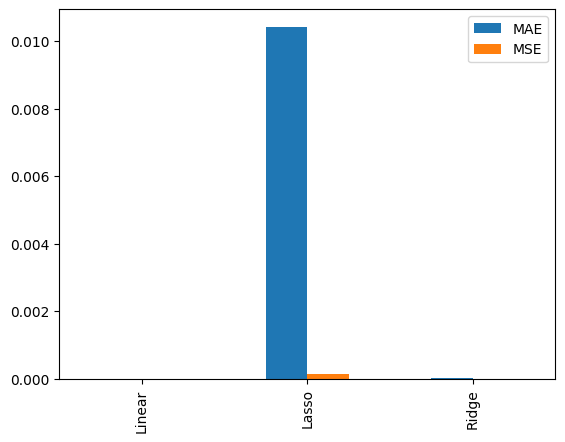

In [32]:
#Vemos los errores
import pandas as pd
pd.DataFrame({"Linear":linear_r_metrics,
              "Lasso":lasso_r_metrics,
              "Ridge":ridge_r_metrics}).T[['MAE','MSE']].plot(kind='bar')

## 10. Diagnostico del modelo

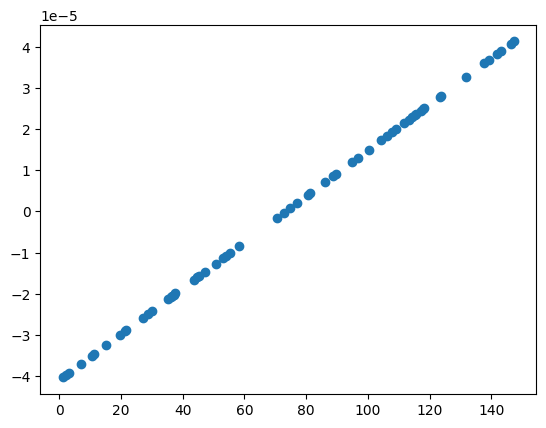

In [33]:
#Evaluamos el supuesto de linealidad de los residuos
residuals = ytest - np.squeeze(y_pred)
plt.scatter(y_pred,residuals);

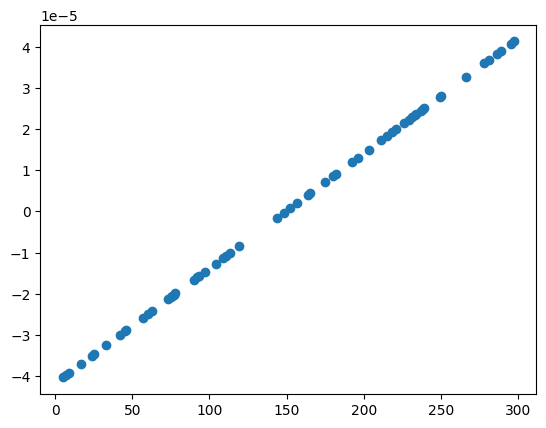

In [34]:
#Evaluamos el supuesto de homoscedasticidad con la variable independiente
plt.scatter(Xtest,residuals)

(array([ 7.,  6.,  7.,  7.,  2.,  6.,  4., 11.,  4.,  6.]),
 array([-4.03198502e-05, -3.21601716e-05, -2.40004930e-05, -1.58408144e-05,
        -7.68113581e-06,  4.78542786e-07,  8.63822138e-06,  1.67979000e-05,
         2.49575786e-05,  3.31172572e-05,  4.12769357e-05]),
 <BarContainer object of 10 artists>)

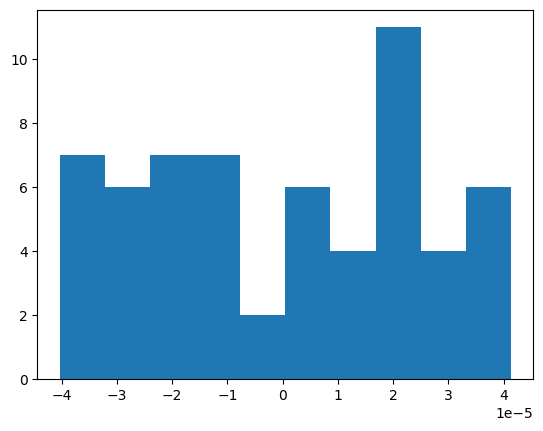

In [35]:
#Evaluamos la normalidad
plt.hist(residuals)

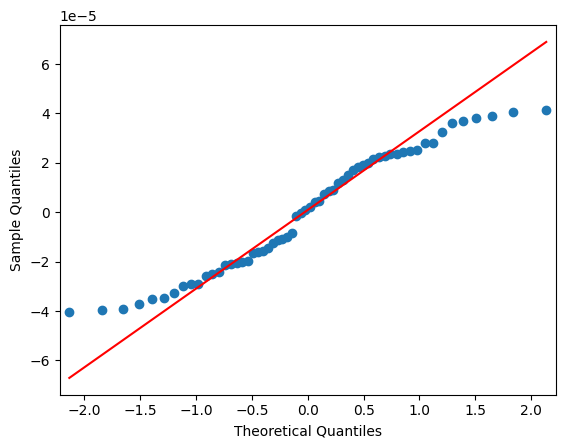

In [36]:
#Tambien podemos evaluar la linealidad de los residuos por quantiles (qqnorm)
import statsmodels.api as sm
import pylab
sm.qqplot(residuals,line='q')
pylab.show()

> **Ejercicio:** crear un conjunto de datos para regression con `from sklearn.datasets import make_regression` con una sola feature, y si quieren le agregan noise (5)

pd: seguir los pasos del colab